# Exponential random numbers

Generate random numbers distributed according to an exponential function.

Explained in chapter 1.6 and used in exercise 1.30 and 1.31


In [13]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [14]:
# define ppf for exponential function (s. Table 1.21 in the book)
# lambda is a reserved variable in python (lambda-function); 
# therefore we use lam as variable name. 
def pdf(x, lam):
    return lam*np.exp(-lam*x)

In [15]:
# define cdf for exponential function (s. Table 1.21 in the book)
def cdf(x,lam):
    return 1-np.exp(-lam*x)

In [16]:
# define ppf for exponential function (s. Table 1.21 in the book)
def ppf(U,lam):
    return -(1/lam)*np.log(U)

In [17]:
def inversion(N, lam, ppf):
    """
    Generate N random numbers using the ppf functions.
    They should be distributed like the pdf-function. 
    """
    U = np.random.rand(N)
    return ppf(U,lam)
    

In [18]:
# make some plots
N = 100000
lam = 0.5
X  = np.random.rand(N)     # array of uniform random numbers in (0,1)
YF  = pdf(X, lam)          # array YF = pdf(X)
YR = inversion(N, lam,ppf) # array of random numbers

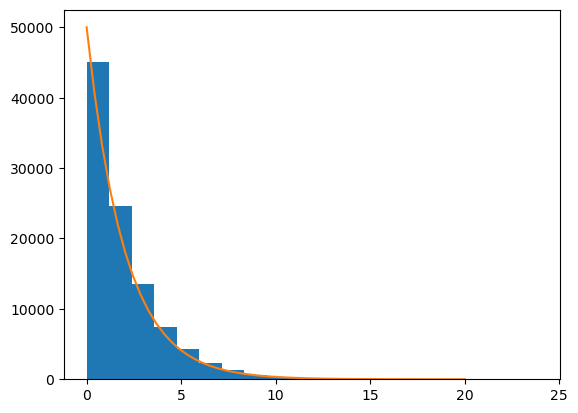

In [19]:
plt.hist(YR, bins=20) # plot histogram of random numbers
x = np.linspace(0,20, num=50) # array of 50 equally space numbers in (0,20)
plt.plot(x,pdf(x,lam)*N) # plot exponential function 
plt.show()

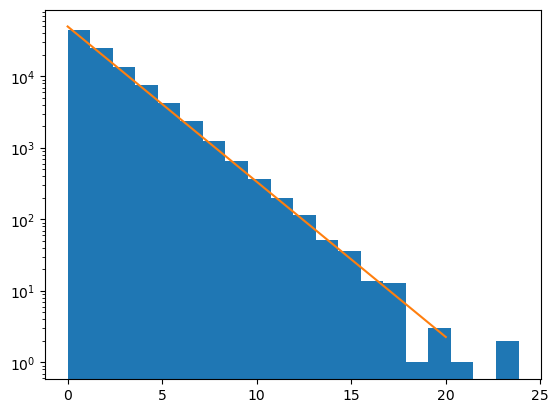

In [20]:
# The same on log-scale
plt.yscale('log')
plt.hist(YR, bins=20) # plot histogram of random numbers
plt.plot(x,pdf(x,lam)*N) # plot exponential function 
plt.show()

# Exercise 1.31

Fit the lambda parameter to the histogram

(array([0.45127853]), array([[4.95992405e-05]]))

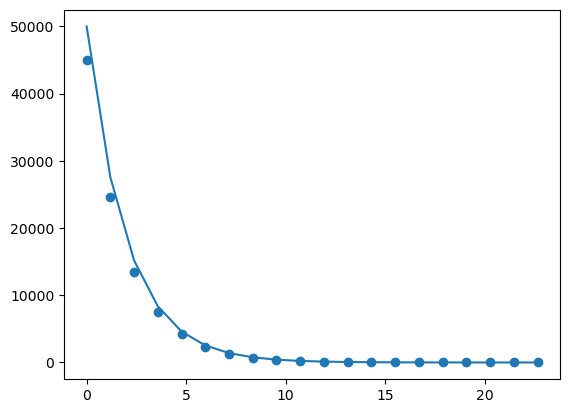

In [21]:
# make histogram data with 20 bins
# chose lower ledge of bin first
data = np.histogram(YR, bins=20)
xlow = data[1][:-1] # use the lower edge of each bin for x
ydata = data[0] 
xdata = xlow
f = lambda x,lam: N*pdf(x,lam)
plt.scatter(xdata,ydata)
plt.plot(xdata, f(xdata,lam))
curve_fit(f,xdata,ydata) # curve_fit returns fit value for lam and error

(array([0.57717436]), array([[0.02974244]]))

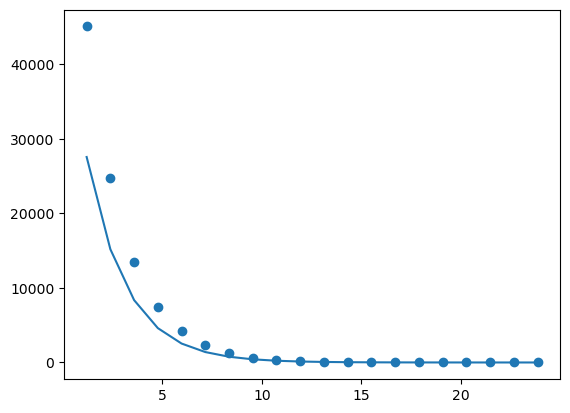

In [22]:
# do the same but with xdata = xup

# choose lower ledge of bin
data = np.histogram(YR, bins=20)
xup  = data[1][1:]  # use upper edge of each bin for x
ydata = data[0] 
xdata = xup
f = lambda x,lam: N*pdf(x,lam)
plt.scatter(xdata,ydata)
plt.plot(xdata, f(xdata,lam))
curve_fit(f,xdata,ydata) # curve_fit returns fit value for lam and error

lam0:  0.5022986541132054
delta0:  0.21865753840422314


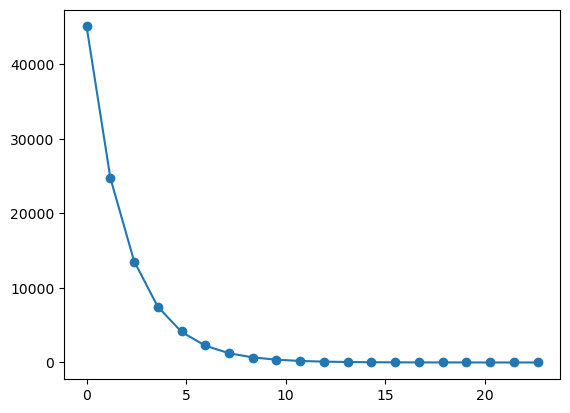

In [23]:
# fit 2 paramaters: lam, delta
# delta is the offset, which is added to xlow

# choose lower edge of bin
data = np.histogram(YR, bins=20)
xlow = data[1][:-1] # use the lower edge of each bin for x
xup  = data[1][1:]  # use upper edge of each bin for x
ydata = data[0] 
xdata = xlow
f = lambda x,lam, delta: N*pdf(x+delta,lam)
curve_fit(f,xlow,ydata)
plt.scatter(xdata,ydata)
res = curve_fit(f,xdata,ydata) # curve_fit returns fit value for lam and error
lam0 = res[0][0]   # fit value for lambda
print("lam0: ",lam0)
delta0 = res[0][1]
print("delta0: ",delta0)
plt.plot(xdata, f(xdata,lam0,delta0)) # compare random data with fitted function